In [7]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import numpy as np
import os
import sys
from six.moves import cPickle
import tensorflow as tf
import matplotlib.pyplot as plt

# hyper parameter
batch_size = 32
num_classes = 100
epochs = 30

# 데이터 총 개수 : 40000개
# 클래스 개수 : 100개, 클래스 별 400개 이미지

steps_per_epoch = int(40000/batch_size)
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model.h5'

In [8]:
import sklearn.model_selection as sk

def load_data():
    path = './data'

    fpath = os.path.join(path, 'train_data')
    
    with open(fpath, 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
        
    X_train = d['data']
    y_train = d['labels']
    y_train = np.reshape(y_train, (len(y_train), 1))

    return X_train, y_train

x_train, y_train = load_data()

# x_train : total img dataset
# y_train : total label datset


# test, train dataset 분류하기 
X_train, X_test, y_train, y_test = sk.train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)


(26800, 32, 32, 3) uint8
(26800, 1) int64
(13200, 32, 32, 3) uint8
(13200, 1) int64


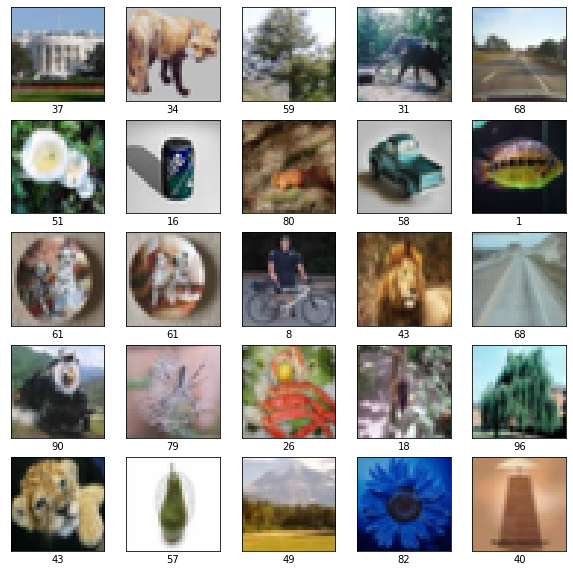

In [3]:
# understand data
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

# check data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

In [9]:
# normalize image data

print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]

newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)

for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
       
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]

X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 121.98364992663635
std before normalization: 68.30227829343998
mean after normalization: 5.568237965794131e-17
std after normalization: 0.9999999999999987
2.025461104398623


In [10]:
# label preprocessing: one hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# make dataset

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(32)

In [14]:
# 원래 model
model = Sequential()

model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5120100   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
Total params: 5,131,600
Trainable params: 5,131,600
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(dataset, epochs=epochs,
                    shuffle=True,
                    validation_data=val_dataset,
                    workers=4)

Epoch 1/30
838/838 [==============================] - 47s 56ms/step - loss: 4.0750 - accuracy: 0.1117 - val_loss: 3.8244 - val_accuracy: 0.1527
Epoch 2/30
838/838 [==============================] - 47s 56ms/step - loss: 3.5522 - accuracy: 0.1990 - val_loss: 3.8023 - val_accuracy: 0.1584
Epoch 3/30
838/838 [==============================] - 47s 56ms/step - loss: 3.3029 - accuracy: 0.2487 - val_loss: 3.8484 - val_accuracy: 0.1573
Epoch 4/30
838/838 [==============================] - 46s 55ms/step - loss: 3.1199 - accuracy: 0.2838 - val_loss: 3.9178 - val_accuracy: 0.1535
Epoch 5/30
838/838 [==============================] - 46s 55ms/step - loss: 2.9672 - accuracy: 0.3157 - val_loss: 3.9995 - val_accuracy: 0.1506
Epoch 6/30
838/838 [==============================] - 45s 54ms/step - loss: 2.8341 - accuracy: 0.3449 - val_loss: 4.0901 - val_accuracy: 0.1459
Epoch 7/30
838/838 [==============================] - 46s 55ms/step - loss: 2.7150 - accuracy: 0.3711 - val_loss: 4.1878 - val_accuracy:

In [ ]:
history2 = model.fit(dataset, epochs=epochs,
                    shuffle=True,
                    validation_data=val_dataset,
                    steps_per_epoch=steps_per_epoch,
                    workers=4)

In [ ]:
# 원래 model
model = Sequential()

model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train
# history = model.fit(X_train, y_train, 
#             batch_size=batch_size,
#             epochs=epochs,
#             steps_per_epoch=steps_per_epoch,
#             shuffle=True,
#             validation_data=(X_test, y_test),
#             workers=4)

In [ ]:
# 다른 모델도 .. 만들어보자 ^^~!

model = Sequential()

model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))





model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            shuffle=True,
            validation_data=(X_test, y_test),
            workers=4)

In [ ]:
# 샘플 모델 
batchSize = 512                   #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 50                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows = 32                     #-- input image dimensions
img_cols = 32 


from keras import initializers
import copy
result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(64, 3, 3,
                            border_mode='same',
                            input_shape=(img_rows, img_cols,3)))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 2
    model.add(Conv2D(128, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 3                         
    model.add(Conv2D(256, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##-- layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    #-- layer 5
    model.add(Dense(512, activation='relu'))

    #-- layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    model_cce = model.fit(X_train, Y_train, batch_size=batchSize, nb_epoch=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    y[dropout] = model.predict(X_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   
    loss.append(score[0])
    acc.append(score[1])